In [2]:
# Importing required libraries
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.1.0


In [3]:
# Importing the Model
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

In [4]:
# Freezing layers for Fine Tuning
for layer in model.layers:
	layer.trainable = False

In [5]:
# Manipulating layers for custom classes
x = model.output
x = tf.keras.layers.Flatten(name='flatten')(x)
x = tf.keras.layers.Dense(512, activation=tf.nn.sigmoid, name="fc1")(x)
x = tf.keras.layers.Dropout(0.25, name="drop1")(x)
x = tf.keras.layers.Dense(512, activation=tf.nn.sigmoid, name='fc2')(x)
x = tf.keras.layers.Dropout(0.25, name='drop2')(x)
x = tf.keras.layers.Dense(5, activation=tf.nn.softmax, name='predictions')(x)
custom_model = tf.keras.Model(inputs=model.input, outputs=x)

In [6]:
# Visualizing Model Summary
custom_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
# Visualizing Model Architecture
# tf.keras.utils.plot_model(custom_model,'model.png')

In [7]:
# Preparing Training, Validation and Testing Data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
# ,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
train_generator = train_datagen.flow_from_directory('/home/bhaven/Downloads/dataset/resized_even_train', batch_size=32, target_size=(224, 224), class_mode='categorical', subset='training', shuffle=True)
validation_generator = train_datagen.flow_from_directory('/home/bhaven/Downloads/dataset/resized_even_train', batch_size=32, target_size=(224, 224), class_mode='categorical', subset='validation', shuffle=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# ,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_generator = test_datagen.flow_from_directory('/home/bhaven/Downloads/test', target_size=(224,224), batch_size=60, class_mode ='categorical', shuffle=True)

Found 30419 images belonging to 5 classes.
Found 7603 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [5]:
# Compiling the Model
custom_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=.0001, name='Adam'), metrics=['accuracy'])

In [6]:
# Saving Model Checkpoints
# checkpoint_path = "training_1/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     checkpoint_path, monitor='val_accuracy', verbose=0, save_best_only=False,
#     save_weights_only=False, mode='auto', save_freq='epoch')

In [7]:
# Training the Model
history = custom_model.fit(train_generator, epochs=50, validation_data=validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 951 steps, validate for 238 steps
Epoch 1/50
951/951 [==============================] - 395s 415ms/step - loss: 1.5604 - accuracy: 0.2975 - val_loss: 1.5417 - val_accuracy: 0.3172
Epoch 2/50
951/951 [==============================] - 390s 410ms/step - loss: 1.5264 - accuracy: 0.3368 - val_loss: 1.5176 - val_accuracy: 0.3457
Epoch 3/50
951/951 [==============================] - 390s 410ms/step - loss: 1.5099 - accuracy: 0.3598 - val_loss: 1.4941 - val_accuracy: 0.3833
Epoch 4/50
951/951 [==============================] - 387s 407ms/step - loss: 1.4947 - accuracy: 0.3772 - val_loss: 1.4898 - val_accuracy: 0.3839
Epoch 5/50
951/951 [==============================] - 389s 409ms/step - loss: 1.4837 - accuracy: 0.3939 - val_loss: 1.4819 - val_accuracy: 0.3938
Epoch 6/50
951/951 [==============================] - 389s 410ms/step - loss: 1.4757 - accuracy: 0.4016 - val_loss: 1.4731 - val_accuracy: 0.4047
Epoch 7/50
951/951 [==========

In [8]:
# Calculating Model Test Score
score = custom_model.evaluate(test_generator, verbose=0)
print('Test accuracy:', 100*score[1])
print('\nTest loss:', score[0])

  ...
    to  
  ['...']
Test accuracy: 41.66666567325592

Test loss: 1.4724565744400024


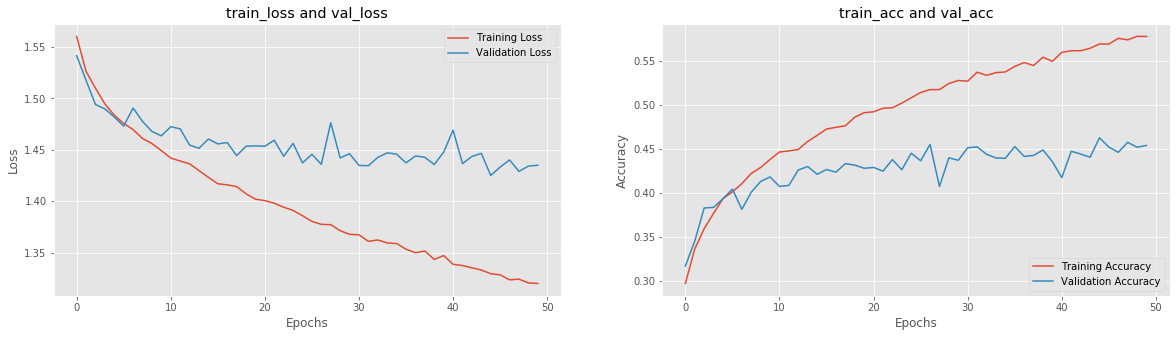

In [9]:
# Visualizing Training and Test attributes
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.style.use('ggplot')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(train_loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('train_loss and val_loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(train_acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('train_acc and val_acc')
plt.legend(loc='lower right')

In [10]:
# Saving Model
custom_model.save('/home/bhaven/Downloads/Models/diabetic.h5')

# architecture to JSON, weights to HDF5
custom_model.save_weights('/home/bhaven/Downloads/Models/weights.h5')
with open('/home/bhaven/Downloads/Models/architecture.json', 'w') as f:
        f.write(custom_model.to_json())

In [11]:
# Loading Saved Model
# architecture and weights from HDF5
model = tf.keras.models.load_model('/home/bhaven/Downloads/Models/diabetic.h5')
# architecture from JSON, weights from HDF5
with open('/home/bhaven/Downloads/Models/architecture.json') as f:
    model = tf.keras.models.model_from_json(f.read())
model.load_weights('/home/bhaven/Downloads/Models/weights.h5')

In [12]:
# Getting test batch and label batch
for image_batch, label_batch in test_generator:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break
CLASS_NAMES = np.array(['0','1','2','3','4'])

Image batch shape:  (60, 224, 224, 3)
Label batch shape:  (60, 5)


In [13]:
# Predicting test batch
prediction = model.predict(image_batch)

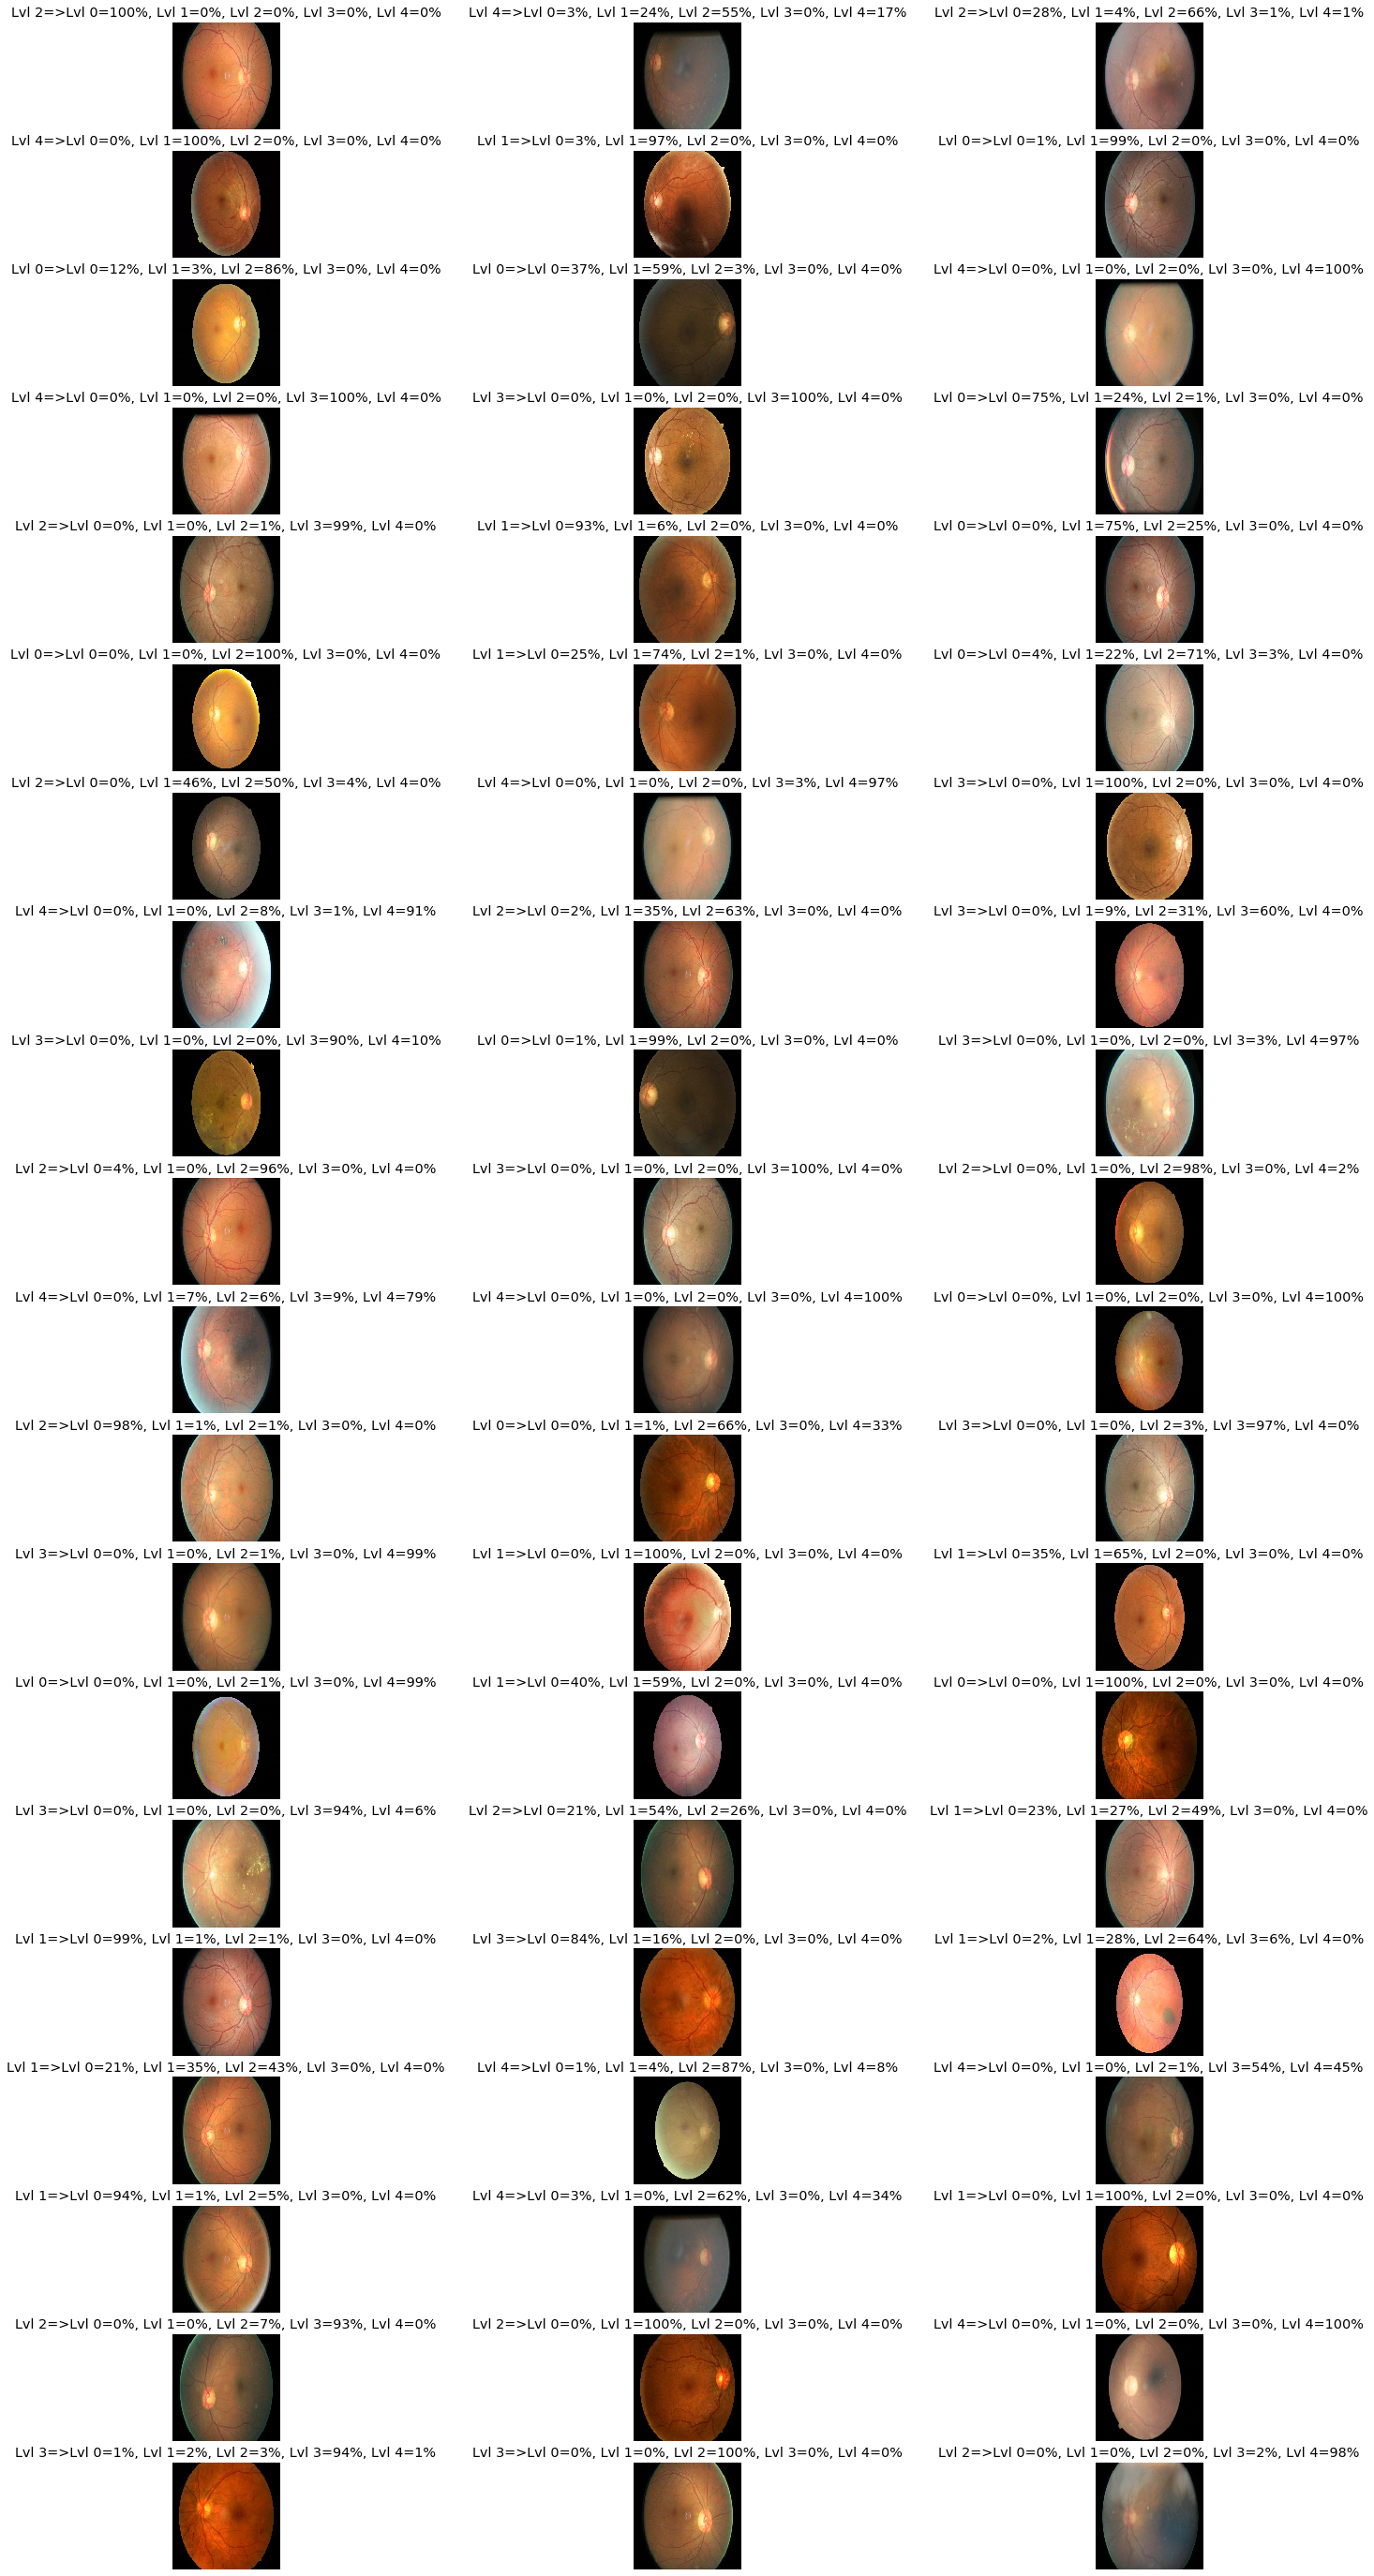

In [14]:
# Visualizing Predictions
plt.figure(figsize=(25,50))
plt.style.use('ggplot')
for n in range(test_generator.samples):
    ax = plt.subplot(20,3,n+1)
    plt.imshow(image_batch[n])
    plt.title("Lvl {}=>Lvl 0={:.0f}%, Lvl 1={:.0f}%, Lvl 2={:.0f}%, Lvl 3={:.0f}%, Lvl 4={:.0f}%".format(CLASS_NAMES[label_batch[n]==1][0],100*prediction[n,0],100*prediction[n,1],100*prediction[n,2],100*prediction[n,3],100*prediction[n,4]))
    plt.axis('off')
# plt.savefig('pred.jpeg')